## **Exploratory Data Analysis (EDA)**

This notebook contains data cleaning, distribution plots, correlation analyses, and initial geospatial check.

In [17]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# For inline plots
%matplotlib inline

In [2]:
# Load Data

df = pd.read_csv('../data/phivolcs_earthquake_data.csv')
df.head()

,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location
0,2016-01-01 00:40:00,17.34,120.30,023,3.0,015 km N 87° W of San Esteban (Ilocos Sur)
1,2016-01-01 05:06:00,14.65,123.12,017,3.3,054 km N 42° E of Paracale (Camarines Norte)
2,2016-01-01 13:24:00,09.76,125.46,012,2.4,005 km S 42° W of Surigao City
3,2016-01-01 15:01:00,17.30,120.27,026,2.9,018 km S 81° W of San Esteban (Ilocos Sur)
4,2016-01-01 20:27:00,08.89,126.28,024,3.0,004 km S 44° W of Cagwait (Surigao del Sur)


In [3]:
# Data Checks
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95564 entries, 0 to 95563
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date_Time_PH  95564 non-null  object 
 1   Latitude      95564 non-null  object 
 2   Longitude     95564 non-null  object 
 3   Depth_In_Km   95563 non-null  object 
 4   Magnitude     95564 non-null  float64
 5   Location      95564 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.4+ MB


,Magnitude
count,95564.000000
mean,2.546805
std,0.696405
min,1.000000
25%,2.100000
50%,2.400000
75%,2.900000
max,7.500000


### **Clean and Prepare Data**

In [15]:
import sys
sys.path.append('../src')

from data_processing import load_data, clean_data

df = load_data('../data/phivolcs_earthquake_data.csv')
df = clean_data(df)

df['Depth_In_Km'] = pd.to_numeric(df['Depth_In_Km'], errors='coerce')
df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

df.head()

,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location,Date_Time
0,2016-01-01 00:40:00,17.34,120.30,23.0,3.0,015 km N 87° W of San Esteban (Ilocos Sur),2016-01-01 00:40:00
1,2016-01-01 05:06:00,14.65,123.12,17.0,3.3,054 km N 42° E of Paracale (Camarines Norte),2016-01-01 05:06:00
2,2016-01-01 13:24:00,9.76,125.46,12.0,2.4,005 km S 42° W of Surigao City,2016-01-01 13:24:00
3,2016-01-01 15:01:00,17.30,120.27,26.0,2.9,018 km S 81° W of San Esteban (Ilocos Sur),2016-01-01 15:01:00
4,2016-01-01 20:27:00,8.89,126.28,24.0,3.0,004 km S 44° W of Cagwait (Surigao del Sur),2016-01-01 20:27:00


### **Analyze Distributions**

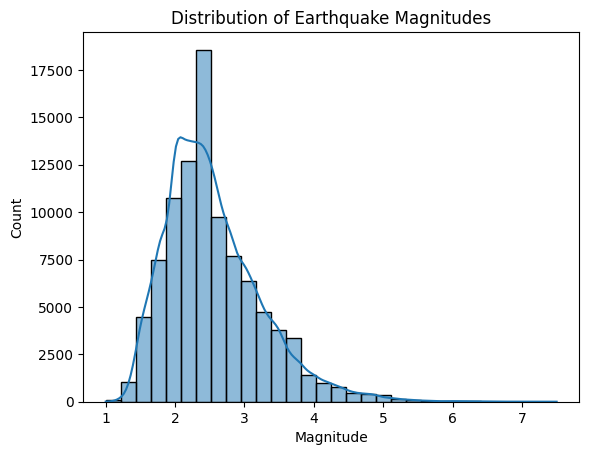

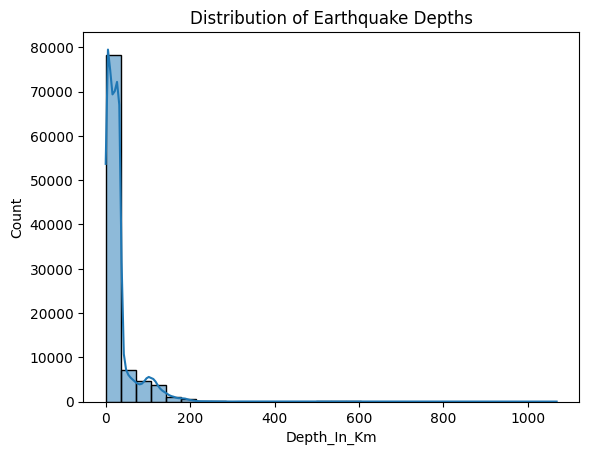

In [11]:
df['Depth_In_Km'] = pd.to_numeric(df['Depth_In_Km'], errors='coerce')
df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')

# Distribution of Magnitude
sns.histplot(df['Magnitude'], kde=True, bins=30)
plt.title("Distribution of Earthquake Magnitudes")
plt.show()

# Distribution of Depth
sns.histplot(df['Depth_In_Km'], kde=True, bins=30)
plt.title("Distribution of Earthquake Depths")
plt.show()

### **Check Correlation**

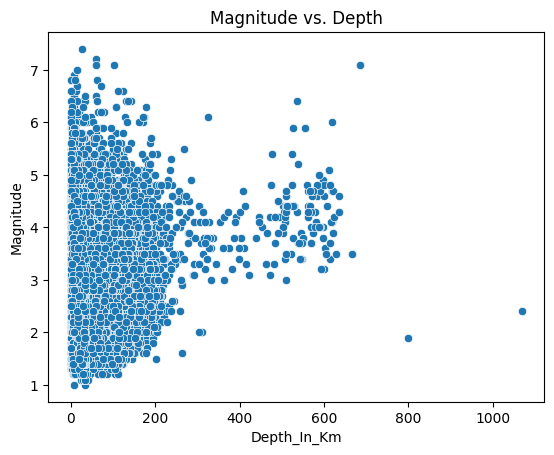

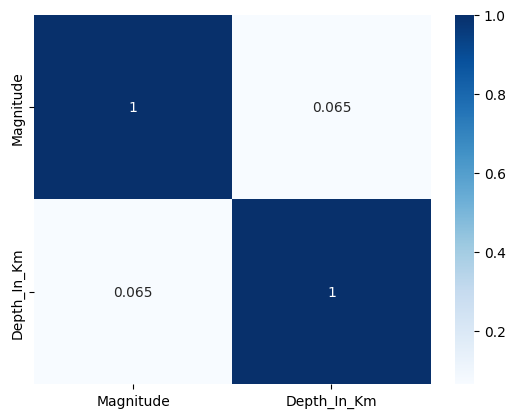

In [12]:
sns.scatterplot(x='Depth_In_Km', y='Magnitude', data=df)
plt.title("Magnitude vs. Depth")
plt.show()

corr_matrix = df[['Magnitude','Depth_In_Km']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

### **Plot Coverage of Earthquake points**

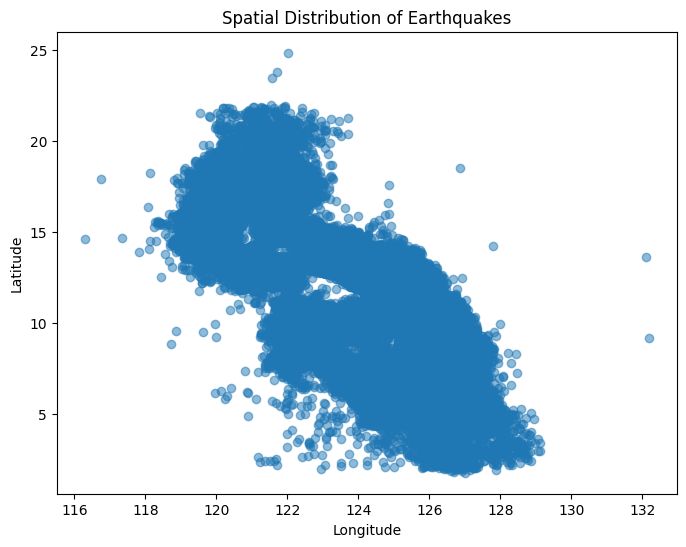

In [100]:
filtered_df = df[(df['Longitude'] >= 100) & (df['Longitude'] <= 140)]

plt.figure(figsize=(8,6))
plt.scatter(filtered_df['Longitude'], filtered_df['Latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Earthquakes')
plt.show()


### **Visualize Administrative Regions in the Philippines from Shapefiles**

In [119]:
# Load Shapefiles
import os

shapefile_path = '../data/philippines_shapefile/ph.shp'

ph_shape = gpd.read_file(shapefile_path).to_crs(epsg=4326)
ph_shape = ph_shape.drop(columns=['source'])
ph_shape = ph_shape.rename(index=str, columns={'name' : 'region_name'})

print(ph_shape)
print(ph_shape.crs)

      id                           region_name  \
0   PH11                                 Davao   
1   PH13                                Caraga   
2   PH10                     Northern Mindanao   
3   PH14  Autonomous Region in Muslim Mindanao   
4   PH09                   Zamboanga Peninsula   
5   PH41                              Mimaropa   
6   PH40                            Calabarzon   
7   PH08                       Eastern Visayas   
8   PH05                                 Bicol   
9   PH03                         Central Luzon   
10  PH02                        Cagayan Valley   
11  PH00               National Capital Region   
12  PH15      Cordillera Administrative Region   
13  PH01                                Ilocos   
14  PH07                       Central Visayas   
15  PH06                       Western Visayas   
16  PH12                          Soccsksargen   

                                             geometry  
0   MULTIPOLYGON (((125.77687 6.89403, 125.

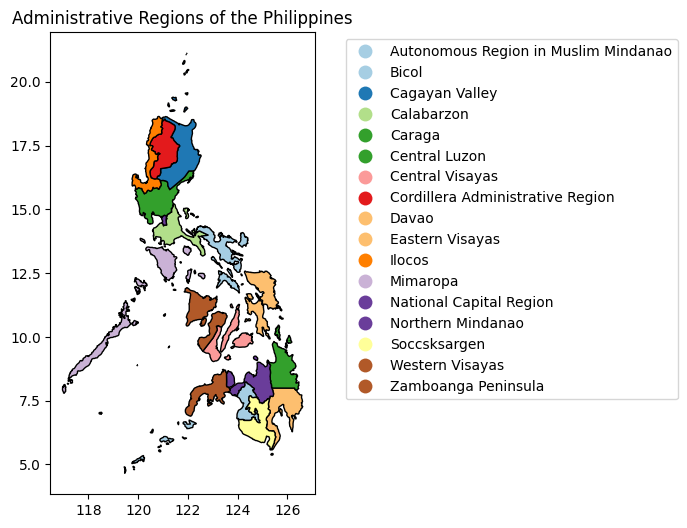

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ph_shape.plot(ax=ax, column='region_name', legend=True, cmap='Paired', edgecolor='black', legend_kwds={'bbox_to_anchor': (2.4, 1)})

plt.title("Administrative Regions of the Philippines")
plt.show()

### **Initial Mapping**

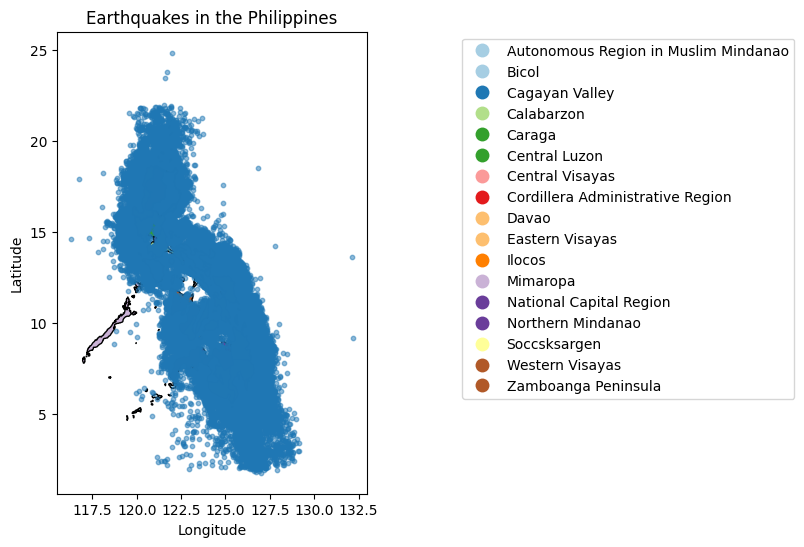

In [127]:
fig, ax = plt.subplots(figsize=(6,6))
ph_shape.plot(ax=ax, column='region_name', legend=True, cmap='Paired', edgecolor='black', legend_kwds={'bbox_to_anchor': (2.4, 1)})

ax.scatter(
    filtered_df['Longitude'], 
    filtered_df['Latitude'], 
    alpha=0.5, 
    s=10   
)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title("Spatial Distribution of Earthquake Epicenters")
plt.show()

In [124]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf_quakes = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
gdf_joined = gpd.sjoin(gdf_quakes, ph_shape, how='left')
gdf_joined.dropna(subset=['region_name'], inplace=True)

quake_counts = gdf_joined.groupby('region_name').size().reset_index(name='quake_count')
print(quake_counts)


                             region_name  quake_count
0   Autonomous Region in Muslim Mindanao          769
1                                  Bicol          876
2                         Cagayan Valley         1063
3                             Calabarzon         1451
4                                 Caraga         4592
5                          Central Luzon         1632
6                        Central Visayas         1203
7       Cordillera Administrative Region         3708
8                                  Davao         3510
9                        Eastern Visayas         2598
10                                Ilocos         2514
11                              Mimaropa         1292
12               National Capital Region            2
13                     Northern Mindanao          986
14                          Soccsksargen         4512
15                       Western Visayas          761
16                   Zamboanga Peninsula          601


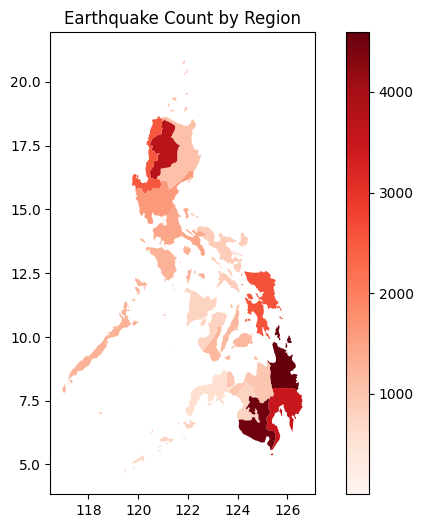

In [125]:
ph_regions = ph_shape.merge(quake_counts, on='region_name', how='left')

ph_regions.plot(
    column='quake_count',
    cmap='Reds',
    legend=True,
    figsize=(8,6)
)
plt.title("Earthquake Count by Region")
plt.show()
